In [1]:
%matplotlib widget

In [2]:
import numpy as np
import dataset
import plot_utils

In [3]:
# Generate data
m = 100
X,Y = dataset.get_beans(m)

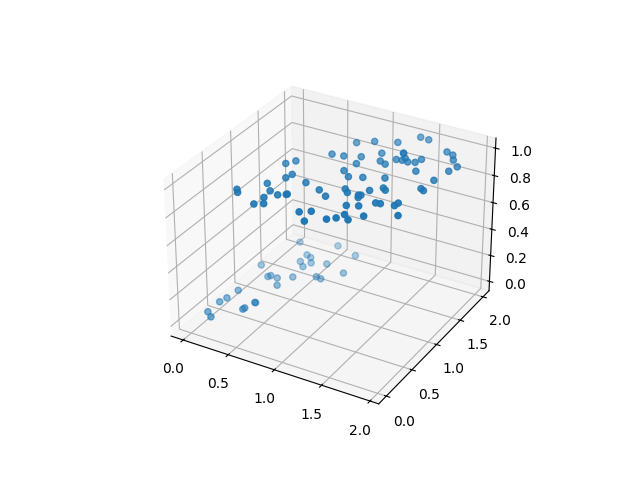

In [4]:
# checkout our data
plot_utils.show_scatter(X,Y)

In [5]:
W = np.array([0.1, 0.1])
B = np.array([0.1])

def forward(X: np.ndarray):
    Z = X @ W + B
    A = 1/(1+np.exp(-Z)) # numpy BROADCASTS
    return A


In [6]:
# stochastic gradient descent
for _ in range(500):
    for i in range(m):
        Xi = X[i]
        Yi = Y[i]
        A = forward(Xi)
        
        E = (Yi - A)**2
        
        dEdA = -2 * (Yi - A)
        dAdZ = A * (1 - A)
        dZdW = Xi # 1x2
        dZdB = 1
        
        dE_dW = dEdA * dAdZ * dZdW # 1x2
        dE_dB = dEdA * dAdZ * dZdB # 1x1
        
        alpha = 0.01
        W = W - alpha * dE_dW
        B = B - alpha * dE_dB


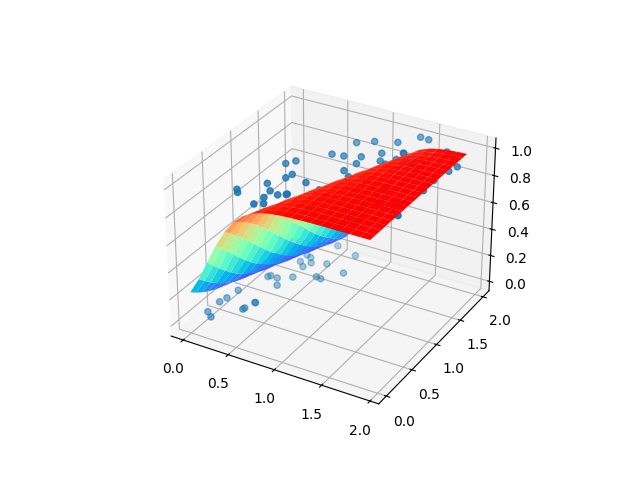

In [8]:
plot_utils.show_scatter_surface(X, Y, forward)
